<img style="float: left; width: 260px;" src="images/newton.png">
***
# <font color="grey">    Lecture 5 - Newton's Method</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$

In Lecture 4 we found out that gradient descent works, and has linear convergence. In this lecture we introduce Newton's method, an algorithm that takes advantage of the second derivative and has quadratic convergence under certain circumstances. Throughout this lecture, $\norm{\cdot}$ will refer to the $2$-norm $\norm{\cdot}_2$.


---
## <font color="grey">Newton's method</font>
---

Let $f\in C^2(\R^n)$ and let's look again at the unconstrained problem

\begin{equation*}
 \minimize f(\vct{x}).
\end{equation*}

Newton's method starts with a guess $\vct{x}_0$ and then proceeds to compute a sequence of points $\{\vct{x}_k\}_{k\geq 0}$ in $\R^n$ by the rule

\begin{equation*}
 \vct{x}_{k+1} = \vct{x}_k - \nabla^2 f(\vct{x}_k)^{-1}\nabla f(\vct{x}_k), \quad k\geq 0.
\end{equation*}

The algorithm stops when $\norm{\vct{x}_{k+1}-\vct{x}_k}<\e$ for some predefined tolerance $\e>0$.
In the context of the general scheme $\vct{x}_{k+1}=\vct{x}_k+\alpha_k\vct{p}_k$, the step length is $\alpha_k=1$, and the search direction is the inverse of the Hessian multiplied with the negative gradient. 

Recall that the inner product $\ip{\vct{p}}{\nabla f(\vct{x})}$ is the directional
derivative of $f$,
and that a *descent direction* is a direction in which the rate of change (slope) is negative. The following gives a criterion for the search direction in Newton's method to be a descent direction.

**Lemma. **
Let $\mtx{B}\in \R^{n\times n}$ be a positive definite symmetric matrix and $f\in C^1(\mtx{R}^n)$.
Then $\vct{p}=-\mtx{B}^{-1}\nabla f(\vct{x})$ is a descent direction of $f$ at $\vct{x}$.

**Proof. **
 If $\mtx{B}\in \R^{n\times n}$ is symmetric and positive definite, then $\mtx{B}^{-1}$ is also positive definite, since for all $\vct{v}\in \R^n$,
 
 \begin{equation*}
  \vct{v}^{\trans}\vct{B}^{-1}\vct{v}= (\mtx{B}\vct{B}^{-1}\vct{v})^{\trans}\vct{B}^{-1}\vct{v}
  = 
  (\mtx{B}^{-1}\vct{v})^{\trans}\mtx{B}^{\trans} (\mtx{B}^{-1}\vct{v}) = (\mtx{B}^{-1}\vct{v})^{\trans}\mtx{B} (\mtx{B}^{-1}\vct{v})>0.
 \end{equation*}

(This can also be seen by noting that the eigenvalues of $\mtx{B}^{-1}$ are the inverses of the eigenvalues of $\mtx{B}$.)

For $\vct{p}=-\mtx{B}^{-1}\nabla f(\vct{x})$ we then get

\begin{equation*}
  \ip{\vct{p}}{\nabla f(\vct{x})} = -\ip{\vct{B}^{-1}\nabla f(\vct{x})}{\nabla f(\vct{x})} =-\nabla f(\vct{x})^{\trans}\mtx{B}^{-1}\nabla f(\vct{x})<0,
\end{equation*}
which shows that $\vct{p}$ is a descent direction. 

To better understand Newton's method, we first look at the one dimensional case. 


**Example.** Let $f\in C^2(\R)$. In this case Newton's method is described as
 
 \begin{equation*}
  x_{k+1} = x_k-\frac{f'(x_k)}{f''(x_k)}, \quad k\geq 0.
 \end{equation*}

Newton's method looks for a local minimizer in the form of a point $x^*$ such that $f'(x^*)=0$ and $f''(x^*)>0$. Setting $g(x):=f'(x)$, we are looking for a {\em root} $x^*$,

\begin{equation*}
 g(x^*)=0.
\end{equation*}

One approach to find such a root is to approximate the function $g(x)$ at a point $x_k$ by its tangent line,

\begin{equation*}
 g(x) \approx g(x_k)+g'(x_k)(x-x_k),
\end{equation*}

and then identify the next iterate $x_{k+1}$ as the root of this linear approximation:

\begin{equation*}
 g(x_k)+g'(x_k)(x_{k+1}-x_k)=0 \Longleftrightarrow x_{k+1} = x_k-\frac{g(x_k)}{g'(x_k)} 
\end{equation*}

![Newton](images/newton-crop.png)

Geometrically this corresponds to taking the tangent to $g$ at $x_k$ and setting $x_{k+1}$ to be the intersection of this tangent line with the $x$-axis, as shown in the figure.
Replacing $g(x)=f'(x)$ gives precisely Newton's method.

Another way to understand Newton's method is to view it in contrast with gradient descent. While gradient descent corresponds to working with a {\em linear approximation}

\begin{equation*}
 f(\vct{x}_{k+1}) \approx f(\vct{x}_k)+\ip{\nabla f(\vct{x}_k)}{\vct{x}_{k+1}-\vct{x}_k},
\end{equation*}

Newton's method is based on the *quadratic approximation*,

\begin{equation*}
 f(\vct{x}_{k+1}) \approx f(\vct{x}_k)+\ip{\nabla f(\vct{x}_k)}{\vct{x}_{k+1}-\vct{x}_k}+\frac{1}{2}\ip{\nabla^2 f(\vct{x}_k)(\vct{x}_{k+1}-\vct{x}_k)}{\vct{x}_{k+1}-\vct{x}_k}.
\end{equation*}


Consider the function $f$ on $\R^2$,

 \begin{equation*}
  f(\vct{x}) = \frac{1}{2}(x_1^2+10x_2^2).
 \end{equation*}

Starting with $\vct{x}_0=(10,1)^{\trans}$, gradient descent takes $84$ iterations to reach accuracy $10^{-6}$, while Newton's method, unsurpringly, takes only one. 

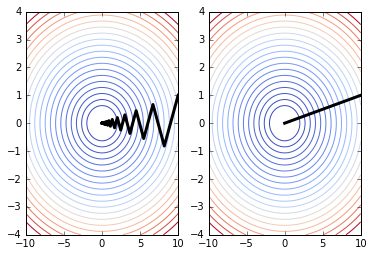

In [60]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# Define the function f and its derivative
def f(x):
    return 0.5*(x[0]**2+10*x[1]**2)

def df(x):
    return np.array([x[0], 10*x[1]])

def ddf(x):
    return np.array([[1, 0], [0, 10]])

# Get a list of values for specifying the level sets
xvals = np.array([[np.linspace(-15,-2,20)], [np.zeros(20)]])
yvals = list(reversed(f(xvals)[0]))

# Create a meshgrid and a contour plot
xx = np.linspace(-10,10,100)
yy = np.linspace(-4,4,100)
X, Y = np.meshgrid(xx, yy)
# The construction inside looks odd: we want to transform the set of input pairs given
# by the meshgrid into a 2 x n array of values that we can apply f to (calling f on such
# an array will apply the function f to each column)
Z = f(np.dstack((X,Y)).reshape((X.size, 2)).transpose())
# the result of applying f is a long list, but we want a matrix
Z = Z.reshape(X.shape)

% matplotlib inline
cmap = plt.cm.get_cmap("coolwarm")

# Now apply gradient descent and newton's method
import numpy.linalg as la

# The implementations below return a whole trajectory, instead of just the final result

def graddesc(f, df, ddf, x0, tol, maxiter=100):
    """
    Gradient descent for quadratic function
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        r = df(x[:,i])
        alpha = np.dot(np.dot(ddf(x[:,i]),x[:,i]),r)/np.dot(r,np.dot(ddf(x[:,i]),r))
        xnew = x[:,i] - alpha*r
        x = np.concatenate((x,xnew.reshape((2,1))), axis=1)
        i += 1
    return x[:,1:]

def newton(f, df, ddf, x0, tol, maxiter=100):
    """
    Newton's method
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        grad = df(x[:,i])
        hess = ddf(x[:,i])
        z = la.solve(hess,grad)
        xnew = x[:,i]-z
        x = np.concatenate((x,xnew.reshape((2,1))), axis=1)
        i += 1
    return x[:,1:]

x0 = np.array([10.,1.])
tol = 1e-8

xg = graddesc(f, df, ddf, x0, tol)
xn = newton(f, df, ddf, x0, tol)

plt.subplot(1,2,1)
plt.contour(X, Y, Z, yvals, cmap = cmap)
plt.plot(xg[0,:], xg[1,:], color='black', linewidth=3)

plt.subplot(1,2,2)
plt.contour(X, Y, Z, yvals, cmap = cmap)
plt.plot(xn[0,:], xn[1,:], color='black', linewidth=3)

plt.show()


In practice, when implementing Newton's method one does not explicitly compute the inverse of the Hessian. The reason is that one does not need the inverse itself, but only the product $\nabla^2f(\vct{x}_k)^{-1}\nabla f(\vct{x}_k)$, which is the solution of a system of equations $\nabla^2 f(\vct{x}_k)\vct{y} = \nabla f(\vct{x}_k)$ that can be solved much more efficiently. One therefore replaces the update step with the following two steps:

\begin{align*}
 \text{ Find } \vct{y} \text{ such that   }\quad  &\nabla^2f(\vct{x}_k)\vct{y}=-\nabla f(\vct{x}_k),\\
                &\vct{x}_{k+1} = \vct{x}_k+\vct{y}.
\end{align*}

There is a lot that can go wrong with Newton's method. In particular, the matrix $\nabla^2f(\vct{x})$ has to be non-singular, or invertible, at every step. If, however, we start at a point $\vct{x}_0$ that is not too far from a local minimizer $\vct{x}^*$ with $\nabla f(\vct{x}^*)=\zerovct$ and $\nabla^2f(\vct{x}^*)$ positive definite, then we are on the safe side.

**Lemma.**
 Let $\vct{x}^*\in \R^n$ be such that $\nabla^2f(\vct{x}^*)$ is positive definite. Then there exists an open neighbourhood $U$ of $\vct{x}^*$ such that for all $\vct{x}\in U$, $\nabla^2 f(\vct{x})$ is positive definite.

For the main result of this lecture, namely the quadratic convergence of Newton's method, we make the additional assumption that the Hessian $\nabla^2f(\vct{x})$ is Lipschitz continuous as a function of $\vct{x}$.

**Definition.**
 A function $f\colon \R^n\to \R^m$ is Lipschitz continuous on a domain $\Omega\subseteq \R^n$ with respect to a pair of norms on $\R^n$ and $\R^m$ if there is a constant $L>0$ such that for all $\vct{x},\vct{y}\in \Omega$,
 \begin{equation*}
  \norm{f(\vct{x})-f(\vct{y})}\leq L\norm{\vct{x}-\vct{y}}.
 \end{equation*}
 The constant $L$ is called the {\em Lipschitz constant} of the map.

In particular, the Hessian of a function $f\in C^2(\R^n)$, considered as a map from $\R^n$ to $\R^{n\times n}$, is Lipschitz continuous with respect to a norm on $\R^n$ and the corresponding operator norm on $\R^{n\times n}$, 
if for any $\vct{x},\vct{y}$ we have

\begin{equation*}
 \norm{\nabla^2f(\vct{x})-\nabla^2f(\vct{y})}\leq L \norm{\vct{x}-\vct{y}}.
\end{equation*}

**Theorem.** 
 Let $f\in C^2(\R^n)$ and $\vct{x}^*\in \R^n$ a local minimizer with $\nabla f(\vct{x}^*)=\zerovct$ and $\nabla^2f(\vct{x}^*)>0$. Then for $\vct{x}_0$ sufficiently close to $\vct{x}^*$, Newton's method has quadratic convergence.

**Proof.** Assume that $\nabla^2f(\vct{x}_k)$ is positive definite.
 Consider the difference
 
 \begin{align*}
  \norm{\vct{x}_{k+1}-\vct{x}^*} & = \norm{\vct{x}_{k}-\vct{x}^*-\nabla^2f(\vct{x}_k)^{-1}\nabla f(\vct{x}_k)}\\
  &\stackrel{(1)}{=} \norm{\vct{x}_{k}-\vct{x}^*-\nabla^2f(\vct{x}_k)^{-1}(\nabla f(\vct{x}_k)-\nabla f(\vct{x}^*))}\\
  &=  \norm{\nabla^2f(\vct{x}_k)^{-1}(\nabla^2f(\vct{x}_k)(\vct{x}_{k}-\vct{x}^*)-(\nabla f(\vct{x}_k)-\nabla f(\vct{x}^*))}
  \end{align*}
  
where (1) follows from $\nabla f(\vct{x}^*)=\zerovct$.

The Fundamental Theorem of Calculus tells us

\begin{align*}
 \nabla f(\vct{x}^*)-\nabla f(\vct{x}_k) &= \int_{0}^1 \frac{\diff{}}{\diff{t}} \nabla f(\vct{x}_k+t(\vct{x}^*-\vct{x}_k)) \ \diff{t}\\
 &= \int_{0}^1 \nabla^2 f(\vct{x}_k+t(\vct{x}^*-\vct{x}_k))(\vct{x}^*-\vct{x}_k) \ \diff{t}.
\end{align*}

Continuing by inserting this identity,

\begin{align*}
 \norm{\vct{x}_{k+1}-\vct{x}^*} &= \left\|\nabla^2f(\vct{x}_k)^{-1}\int_{0}^1\left[\nabla^2f(\vct{x}_k)- \nabla^2 f(\vct{x}_k+t(\vct{x}^*-\vct{x}_k))\right](\vct{x}_k-\vct{x}^*) \ \diff{t}\right\|\\
 &\leq \norm{\nabla^2f(\vct{x}_k)^{-1}}\cdot \\
 & \quad \int_{0}^1\norm{\nabla^2f(\vct{x}_k)- \nabla^2 f(\vct{x}_k+t(\vct{x}^*-\vct{x}_k))}\ \diff{t} \cdot \norm{(\vct{x}_k-\vct{x}^*)}.
\end{align*}

Applying the Lipschitz bound to the term inside the integral gives

\begin{equation*}
 \norm{\nabla^2f(\vct{x}_k)- \nabla^2 f(\vct{x}_k+t(\vct{x}^*-\vct{x}_k))} \leq L t\norm{\vct{x}_k-\vct{x}^*}.
\end{equation*}

Integrating this out, we end up with the bound

\begin{equation*}
 \norm{\vct{x}_{k+1}-\vct{x}^*} \leq \frac{L}{2}\norm{\nabla^2f(\vct{x}_k)^{-1}}\cdot \norm{\vct{x}_k-\vct{x}^*}^2.
\end{equation*}

The only remaining issue is that the ``constant'' on the right-hand side is not a constant. However, the Lipschitz continuity implies that $\nabla^2f(\vct{x}_k)$ converges to $\nabla^2f(\vct{x}^*)$ if $\vct{x}_k$ converges to $\vct{x}^*$. Since the inversion of a matrix is a continuous operation, also $\nabla^2f(\vct{x}_k)^{-1}$ converges to $\nabla^2 f(\vct{x}^*)^{-1}$. In particular, if $\vct{x}_k$ is sufficiently close to $\vct{x}^*$, we have $\norm{\nabla^2f(\vct{x}_k)^{-1}}\leq 2\norm{\nabla^2f(\vct{x}^*)}$. Setting $M:=L\norm{\nabla^2f(\vct{x}^*)^{-1}}/2$, we end up with the bound

\begin{equation*}
 \norm{\vct{x}_{k+1}-\vct{x}^*} \leq M\cdot \norm{\vct{x}_k-\vct{x}^*}^2.
\end{equation*}

There exists an open neighbourhood around $\vct{x}^*$ in which $\nabla^2f(\vct{x})$ is positive definite, and within this neighbourhood there is an $\vct{x}_0$ such that $\norm{\vct{x}_0-\vct{x}^*}^2<1/M$, which ensures that all following iterates remain in $U$. This shows quadratic convergence. 
\end{proof}

Note that the conditions for quadratic convergence in an open neighbourhood $U$ of $\vct{x}^*$ are precisely that $f$ is convex on $U$.

---
## <font color="grey">Quasinewton methods</font>
---

One drawback of Newton's method is that it requires the computation of the Hessian matrix, which can be expensive.
Quasinewton methods use an approximation of the Hessian, $\mtx{B}_k\approx \nabla f(\vct{x}_k)$, at each step of the algorithm. These are construction in a way that $\mtx{B}_{k+1}$ can easily be computed from $\mtx{B}_k$. A popular method, that is used often in practical applications because of its efficiency, is the **Broyden-Fletcher-Shanno-Goldfarb** (**BFGS**) method. The BFGS method may be described as follows.

* Start with $\vct{x}_0$, $\mtx{B}_0$.
* For $k\geq 0$, compute

\begin{align*}
  \vct{p}_k &= \mtx{B}^{-1}_k \nabla f(\vct{x}_k)\\
  \vct{x}_{k+1} &= \vct{x}_k + \alpha_k \vct{p}_k \text{ for a suitable step length } \alpha_k\\
  \vct{s}_k &= \alpha_k \vct{p}_k\\
  \vct{y}_k &= \nabla f(\vct{x}_{k+1})-\nabla f(\vct{x}_k)\\
  \mtx{B}_{k+1} &= \mtx{B}_k+\frac{\vct{y}_k\vct{y}_k^{\trans}}{\vct{y}_k^{\trans}\vct{s}_k}-\frac{\mtx{B}_k\vct{s}_k\vct{s}_k^{\trans}\mtx{B}_k}{\vct{s}_k^{\trans}\mtx{B}_k\vct{s}_k}. 
\end{align*}

* Stop if $\norm{\nabla f(\vct{x}_k)}<\e$ for some tolerance $\e$, or if $\norm{\vct{x}_{k+1}-\vct{x}_k}<\e$. 